# Algorithms Exercise 1

## Imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [2]:
s = "this is a test\n here it is"
print(s.splitlines())
s.split(" ")

['this is a test', ' here it is']


['this', 'is', 'a', 'test\n', 'here', 'it', 'is']

In [3]:
def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t\n'):
    """Split a string into a list of words, removing punctuation and stop words."""
    # add stuff for multiple lines
    lines = s.splitlines()
    s = " ".join(lines)
   
    # split string into words
    words = s.split(" ")
    
    # remove punctuation
    nopunc = ["".join(list(filter(lambda f: f not in punctuation, x))) for x in words]
       
    # remove stop words
    if stop_words is not None: 
        nostops = list(filter(lambda f: f not in stop_words, nopunc))
        out = nostops
    else:
        out = nopunc
    words = [x.lower() for x in out if len(x) > 0]
    return(words)

In [4]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""

assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [5]:
from collections import Counter
def count_words(data):
    """Return a word count dictionary from the list of words in data."""
    cnt = Counter()
    for word in data: 
        cnt[word] +=1
    return(cnt)

In [6]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [7]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    cnt = Counter(wc)
    return(wc.most_common())

In [8]:
sort_word_counts(count_words(tokenize('this and the this from and a a a')))

[('a', 3), ('and', 2), ('this', 2), ('from', 1), ('the', 1)]

In [9]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [10]:
# import file
f = open('mobydick_chapter1.txt', mode = 'r')
data = f.read()
f.close

# get individual word frequencies
count_words(tokenize(data))
swc = sort_word_counts(count_words(tokenize(data, stop_words = ['the','of','and','a','to','in','is','it','that','as'])))


In [11]:
assert swc[0]==('i',43)
assert len(swc)==848

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

In [12]:
len([float(w[1]) for w in swc])

list(range(10,1,-1))


[10, 9, 8, 7, 6, 5, 4, 3, 2]

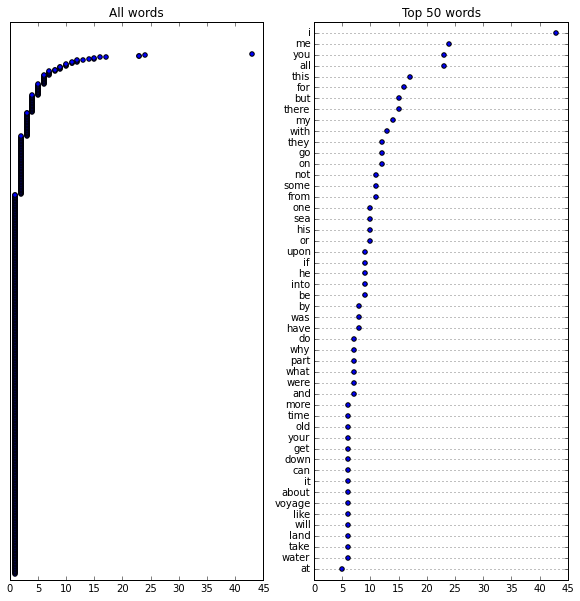

In [13]:
f = plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
revd = list(reversed(swc))
plt.scatter([n[1] for n in revd], range(len(revd)))
# plt.xlabel('word count')
# plt.box(False)
plt.ylim(-10,900)
plt.xlim(0,45)
plt.yticks([])
plt.title("All words")

plt.subplot(1,2,2)
smallDat = swc[0:50]
revd = list(reversed(smallDat))
plt.scatter([n[1] for n in revd], range(len(revd)))
# # plt.xlabel('word count')
# #plt.box(False)
plt.ylim(-1,50)
plt.yticks(range(50), [w[0] for w in revd])
plt.grid(axis = "y")
plt.title("Top 50 words")



In [14]:
assert True # use this for grading the dotplot